# Google colab for Classifying ECG

Project Objectives and Suggestions:

- Main Objective: Identify and classify pathological heartbeats from ECG recordings.
- Dataset: Use the MIT-BIH arrhythmia database (https://physionet.org/content/mitdb/1.0.0/), available in csv format from Kaggle.
- Data Characteristics: 48 half-hour high-resolution recordings of 47 patients (though for some reason the dataset has 234 so ❗**look into it**❗ ) with various cardiologic conditions.

## Steps

- Data Preparation:
  - Preprocess the MIT-BIH dataset.
  - Apply data balancing techniques.
- Model Training:
  - Train individual FFNN models per patient.
  - Train individual CNN models per patient.
  - Implement transfer learning with pre-trained CNNs (if time allows).
- Evaluation and Analysis:
  - Measure performance using defined evaluation metrics.
  - Analyze results, particularly for patients with lower accuracy.

## Detailed Steps

Objective: Train individual models per patient from data recorded from that patient with a fixed recording instrument.

**Research and Literature** 📚
- Read Papers: Explore research based on the MIT-BIH arrhythmia dataset to find interesting objectives and alternative approaches.

**Techniques and Tools** 🛠
- Data Balancing: Address imbalance (more normal than abnormal data).
- Evaluation Metrics: Use accuracy, sensitivity, precision, and F1-score to evaluate model performance.
- Loss Function: Start with Adam optimizer. Research alternatives if needed (e.g., quadratic loss, L1-norm loss, logistic regression).
- Preprocessing: Apply a Butterworth filter to the data.
- Network Types: Feedforward vs. CNN: Experiment with both types to compare performance.

**Experimentation with CNNs** (Propose Two CNNs): 🧪
- Identical Architecture: Use the same architecture for both CNNs.
- Different Data Input: Use different data inputs for each CNN.
- Different Pre-processing Techniques: Apply various pre-processing techniques to the same data before feeding it into the network.


*Approach 1: CNN Classification* **Train CNNs:**
- Create a CNN classification model for each class given in the dataset.

*Approach 2: Transfer Learning (If Time Allows)*
**Transfer Learning Strategy:**
- Train CNN on dataset X with task A.
- Transfer learned features to train on dataset Y with task B.
- Compare results and document changes (note: this approach can be complex to report).

# Get started:

Table of contents:
- Get the data
- Inspect the data (become one with the data)
- Preprocess the data
- Create a model architecture (baseline)
- Fit the model
- Evaluate the model
  - confusion matrix, f1 score (recall-accuracy)
- Improve the baseline
  - hyperparameter tuning
  - undersrand the techniques
  - focus on CNN
  - all patients and then tweak for each patient individually (transfer learning for each)
- Repeat until satisfied

## 1) Get the data

In [1]:
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/

Streaming output truncated to the last 5000 lines.
Length: 5468 (5.3K) [application/octet-stream]
Saving to: ‘physionet.org/files/mitdb/1.0.0/223.atr’

physionet.org/files 100%[===================>]   5.34K  --.-KB/s    in 0s      

2024-05-20 09:32:33 (1.89 GB/s) - ‘physionet.org/files/mitdb/1.0.0/223.atr’ saved [5468/5468]

--2024-05-20 09:32:33--  https://physionet.org/files/mitdb/1.0.0/223.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1950000 (1.9M) [application/octet-stream]
Saving to: ‘physionet.org/files/mitdb/1.0.0/223.dat’

physionet.org/files 100%[===================>]   1.86M  1.27MB/s    in 1.5s    

2024-05-20 09:32:34 (1.27 MB/s) - ‘physionet.org/files/mitdb/1.0.0/223.dat’ saved [1950000/1950000]

--2024-05-20 09:32:34--  https://physionet.org/files/mitdb/1.0.0/223.hea
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 258 [text/plain]
Saving to: ‘physionet

In [2]:
!ls /content/physionet.org/files/mitdb/1.0.0/

100.atr    105.atr  111.atr  116.dat  122.atr  202.dat	209.at_  214.xws  221.xws  231.xws
100.dat    105.dat  111.dat  116.hea  122.dat  202.hea	209.atr  215.at_  222.at_  232.atr
100.hea    105.hea  111.hea  116.xws  122.hea  202.xws	209.dat  215.atr  222.atr  232.dat
100.xws    105.xws  111.xws  117.at_  122.xws  203.at-	209.hea  215.dat  222.dat  232.hea
101.atr    106.atr  112.atr  117.atr  123.atr  203.at_	209.xws  215.hea  222.hea  232.xws
101.dat    106.dat  112.dat  117.dat  123.dat  203.atr	210.atr  215.xws  222.xws  233.atr
101.hea    106.hea  112.hea  117.hea  123.hea  203.dat	210.dat  217.atr  223.atr  233.dat
101.xws    106.xws  112.xws  117.xws  123.xws  203.hea	210.hea  217.dat  223.dat  233.hea
102-0.atr  107.atr  113.atr  118.atr  124.atr  203.xws	210.xws  217.hea  223.hea  233.xws
102.atr    107.dat  113.dat  118.dat  124.dat  205.atr	212.atr  217.xws  223.xws  234.atr
102.dat    107.hea  113.hea  118.hea  124.hea  205.dat	212.dat  219.atr  228.atr  234.dat
102.hea   

## Inspect the data (become one with the data)

 Note🔑: **WFDB (WaveForm DataBase)** library is a set of tools and software library developed for working with physiological signals, primarily those used in electrophysiological research and medicine. It was developed at the PhysioNet resource, which is associated with the MIT Lab for Computational Physiology. The WFDB library is particularly useful for reading, writing, and processing waveform files in the formats supported by PhysioNet, including those in the MIT-BIH Arrhythmia Database.

* Reading and writing ECG signal files in various formats including the PhysioBank-standard formats (.dat, .hea, .atr, etc.).
* Analyzing and processing these signals.
* Accessing metadata about the recordings, such as the sampling frequency, the number of leads, annotations, and more.

In [3]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.5 MB/s eta 0:00:00


MIT-BIH Arrhythmia Database, "atr" stands for annotations. These annotations typically include labels for each heartbeat indicating its type (normal, premature ventricular contraction, etc.), as well as other event markers within the ECG data.

The .atr files specifically contain:

* The annotations related to each heartbeat.
* Timing information showing where each annotated event occurs within the ECG data.
* Symbols and auxiliary information that classify the heartbeats and other significant events recorded in the ECG signal.

These files are crucial for both clinical applications and research, as they provide expert interpretations of the ECG signals, which can be used for training algorithms, validating methodologies, or conducting clinical assessments.

**atr** = annotations

**dat** = actual data

**hea** = useful information (metadata about the waveform data) to correctly interpret .dat files


**Utilizing .dat and .hea Files**
* .dat Files: Contain the raw digital signal data (e.g., ECG waveform data).
* .hea Files: Contain metadata about the .dat files, such as the number of data channels, sampling frequency, and other details necessary to interpret the data correctly.

**Utilizing .atr Files**
* .atr Files: These are annotation files that include expert annotations of the waveform data, such as marking of individual heartbeats, arrhythmias, or other clinically relevant events.

In [4]:
import wfdb

# Path to your data
data_path = '/content/physionet.org/files/mitdb/1.0.0/'

# Load a record (no need to specify '.dat' or '.hea')
# recognizes .dat and .hea file extensions (first reads hea then dat)
record100 = wfdb.rdrecord(data_path + '100')  # assuming '100' is one of the files
# Load annotations (specify the annotation type 'atr')
annotation100 = wfdb.rdann(data_path + '100', 'atr')

# Display the record
print(record100.p_signal)
print(annotation100.symbol)

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '

In [5]:
record101 = wfdb.rdrecord(data_path + '101')  # assuming '100' is one of the files
# Load annotations (specify the annotation type 'atr')
annotation101 = wfdb.rdann(data_path + '101', 'atr')

# Display the record
print(record101.p_signal)
print(annotation101.symbol)

[[-0.345 -0.16 ]
 [-0.345 -0.16 ]
 [-0.345 -0.16 ]
 ...
 [-0.295 -0.11 ]
 [-0.29  -0.11 ]
 [ 0.     0.   ]]
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '~', 'N', '|', 'N', 'N', 'N', 'N', '~', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '

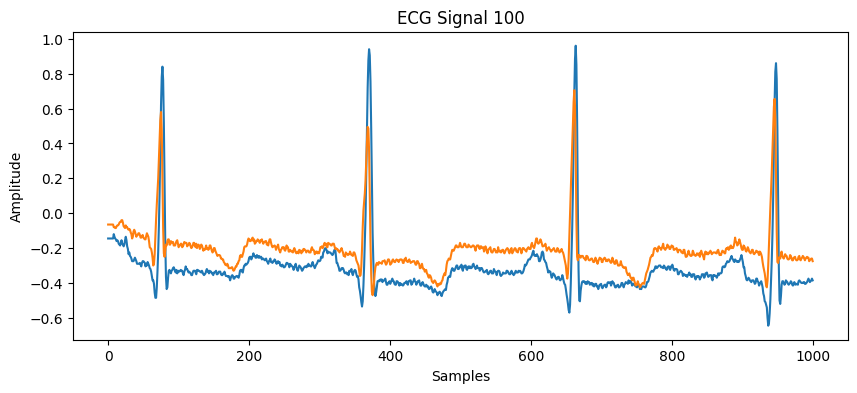

In [6]:
import matplotlib.pyplot as plt

# Plotting the signal
plt.figure(figsize=(10, 4))
plt.plot(record100.p_signal[0:1000])  # Plotting first 1000 samples
plt.title('ECG Signal 100')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

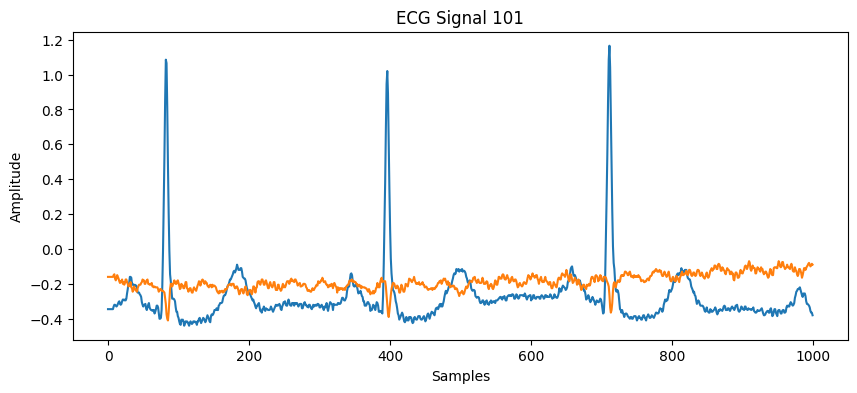

In [7]:
# Plotting the signal
plt.figure(figsize=(10, 4))
plt.plot(record101.p_signal[0:1000])  # Plotting first 1000 samples
plt.title('ECG Signal 101')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

**Purpose of .xws Files:**
* Waveform Visualization: .xws files usually contain settings or specifications that help software visualize the waveforms properly. These settings can include information on how to display the data, such as scaling, layout, or annotations to be highlighted.
* Compatibility: These files are generally used with software like LightWAVE, which is a web-based waveform and annotation viewer available on PhysioNet. LightWAVE uses these .xws files to configure the display of waveforms and annotations for users accessing the database online.

Cannot visualize xws in google colab as this one is used for interactive data. So if we want we can use LightWAVE: online, the .xws file will be used automatically by the platform to set up the waveform display according to the specifications stored in the file.


In [8]:
# Example of reading a .xws file
with open(data_path + '100.xws', 'r') as file:
    contents = file.read()
    print(contents)

-r 100
-a atr
-p http://<!--#echo var="SERVER_NAME" --><!--#echo var="DOCUMENT_URI" -->



In [9]:
with open(data_path + '101.xws', 'r') as file:
    contents = file.read()
    print(contents)

-r 101
-a atr
-p http://<!--#echo var="SERVER_NAME" --><!--#echo var="DOCUMENT_URI" -->



"If your focus is on data analysis, signal processing, or machine learning, you will primarily deal with .dat, .hea, and .atr files, as these contain the raw data and annotations necessary for such tasks."

**Additional File Types at the end of the folder**
* ANNOTATORS: This file likely lists the people or algorithms that have contributed annotations to the dataset. It might contain names or identifiers for annotation sources.
* RECORDS: This is typically a text file that lists all the records in the dataset. It's useful for scripting and automation because it allows programs to quickly know what data files are available.
* SHA256SUMS.txt: This file contains SHA-256 checksums for all files in the directory. It's used to verify the integrity of the files, ensuring that they haven't been corrupted or tampered with.
* index.html: A web page or a HTML file that might contain documentation or an index of the dataset. This could be useful for understanding the dataset's structure or for navigating the dataset if hosted online.
* robots.txt: This is a standard file used on web servers to guide web crawlers about which parts of a site should not be crawled or indexed.

Only relevant one might be the ANNOTATORS one

In [10]:
# Just change the name in '' with the filename you want to view from the ones showed in the text above
file_path = data_path + 'ANNOTATORS'
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

atr	reference beat, rhythm, and signal quality annotations



Save and store the entire dataset

In [11]:
import pandas as pd

# Initialize a list to hold data
ecg_data = []

# Loop through each record
for record_num in range(100, 235):  # 235 is exclusive, so it stops at 234
    record_id = str(record_num)
    data_path = '/content/physionet.org/files/mitdb/1.0.0/'  # Adjust path as necessary

    # Try to read the record and its annotations; skip if not found
    try:
        # Read the record
        record = wfdb.rdrecord(f'{data_path}{record_id}')
        annotations = wfdb.rdann(f'{data_path}{record_id}', 'atr')

        # Store data in a dictionary
        record_data = {
            'Record Number': record_id,
            'Signal': record.p_signal,
            'Annotations': annotations.symbol,
            'Annotation Positions': annotations.sample
        }
        ecg_data.append(record_data)
    except FileNotFoundError:
        print(f"Record {record_id} not found, skipping.")

# convert to a pandas DataFrame for easier manipulation
ecg_df = pd.DataFrame(ecg_data)

# Save DataFrame to a CSV file
ecg_df.to_csv('ecg_data.csv', index=False)

Record 110 not found, skipping.
Record 120 not found, skipping.
Record 125 not found, skipping.
Record 126 not found, skipping.
Record 127 not found, skipping.
Record 128 not found, skipping.
Record 129 not found, skipping.
Record 130 not found, skipping.
Record 131 not found, skipping.
Record 132 not found, skipping.
Record 133 not found, skipping.
Record 134 not found, skipping.
Record 135 not found, skipping.
Record 136 not found, skipping.
Record 137 not found, skipping.
Record 138 not found, skipping.
Record 139 not found, skipping.
Record 140 not found, skipping.
Record 141 not found, skipping.
Record 142 not found, skipping.
Record 143 not found, skipping.
Record 144 not found, skipping.
Record 145 not found, skipping.
Record 146 not found, skipping.
Record 147 not found, skipping.
Record 148 not found, skipping.
Record 149 not found, skipping.
Record 150 not found, skipping.
Record 151 not found, skipping.
Record 152 not found, skipping.
Record 153 not found, skipping.
Record 1

In [12]:
ecg_df

,Record Number,Signal,Annotations,Annotation Positions
0,100,"[[-0.145, -0.065], [-0.145, -0.065], [-0.145, ...","[+, N, N, N, N, N, N, N, A, N, N, N, N, N, N, ...","[18, 77, 370, 662, 946, 1231, 1515, 1809, 2044..."
1,101,"[[-0.345, -0.16], [-0.345, -0.16], [-0.345, -0...","[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[7, 83, 396, 711, 1032, 1368, 1712, 2036, 2349..."
2,102,"[[-0.2, 0.005], [-0.2, 0.005], [-0.2, 0.005], ...","[+, /, /, /, /, /, /, /, /, /, /, /, /, /, /, ...","[68, 136, 410, 697, 989, 1305, 1614, 1911, 220..."
3,103,"[[-0.375, 0.05], [-0.375, 0.05], [-0.375, 0.05...","[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[21, 265, 575, 876, 1180, 1482, 1795, 2127, 24..."
4,104,"[[-0.15, 0.2], [-0.15, 0.2], [-0.15, 0.2], [-0...","[+, /, /, /, /, /, f, f, /, /, /, /, /, f, f, ...","[36, 73, 316, 615, 901, 1188, 1477, 1749, 2062..."
5,105,"[[-0.445, 0.26], [-0.445, 0.26], [-0.445, 0.26...","[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[67, 197, 459, 708, 965, 1222, 1479, 1741, 201..."
6,106,"[[-0.31, 0.195], [-0.31, 0.195], [-0.31, 0.195...","[~, +, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[83, 229, 351, 724, 1086, 1448, 1829, 2197, 25..."
7,107,"[[-2.045, -1.245], [-2.045, -1.245], [-2.045, ...","[+, /, /, /, /, /, /, /, /, /, /, /, /, /, /, ...","[47, 95, 272, 569, 884, 1206, 1519, 1820, 2118..."
8,108,"[[-0.125, -0.78], [-0.125, -0.78], [-0.125, -0...","[+, N, N, N, N, N, N, N, N, N, N, N, N, V, x, ...","[23, 88, 442, 789, 1155, 1493, 1821, 2157, 251..."
9,109,"[[0.175, 0.635], [0.175, 0.635], [0.175, 0.635...","[+, L, L, L, L, L, L, L, L, L, L, L, L, L, L, ...","[18, 111, 343, 571, 807, 1048, 1287, 1523, 176..."


🔑NOTE: We will first try to classify each of the annotations (ex: N, F, V, R, f, / etc.)by having all data combined and see how that goes. Then, we do each patient individuall to fine-tune on them.

In [18]:
def plot_patient(p_number):
  data_path = '/content/physionet.org/files/mitdb/1.0.0/'
  record = wfdb.rdrecord(data_path + p_number)  # assuming '100' is one of the files
  # Load annotations (specify the annotation type 'atr')
  annotation = wfdb.rdann(data_path + p_number, 'atr')

  # Display the record
  print(record.p_signal)
  print(annotation.symbol)

  # Plotting the signal
  plt.figure(figsize=(10, 4))
  plt.plot(record.p_signal[0:1000])  # Plotting first 1000 samples
  plt.title('ECG Signal 100')
  plt.xlabel('Samples')
  plt.ylabel('Amplitude')
  plt.show()

[[-0.08   0.135]
 [-0.08   0.135]
 [-0.08   0.135]
 ...
 [-0.395  0.075]
 [-0.38   0.08 ]
 [ 0.     0.   ]]
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '

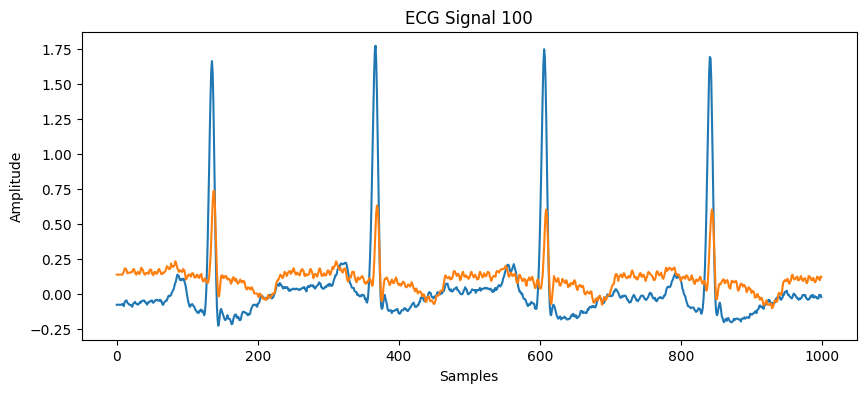

In [21]:
plot_patient('234')

In [23]:
import pandas as pd

# Replace 'path_to_file.csv' with the path to the CSV file you want to load
ecg_df = pd.read_csv('ecg_data.csv')
# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(ecg_df.head())


  Record Number                                             Signal  \
0           100  [[-0.145, -0.065], [-0.145, -0.065], [-0.145, ...   
1           101  [[-0.345, -0.16], [-0.345, -0.16], [-0.345, -0...   
2           102  [[-0.2, 0.005], [-0.2, 0.005], [-0.2, 0.005], ...   
3           103  [[-0.375, 0.05], [-0.375, 0.05], [-0.375, 0.05...   
4           104  [[-0.15, 0.2], [-0.15, 0.2], [-0.15, 0.2], [-0...   

                                         Annotations  \
0  [+, N, N, N, N, N, N, N, A, N, N, N, N, N, N, ...   
1  [+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...   
2  [+, /, /, /, /, /, /, /, /, /, /, /, /, /, /, ...   
3  [+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...   
4  [+, /, /, /, /, /, f, f, /, /, /, /, /, f, f, ...   

                                Annotation Positions  
0  [18, 77, 370, 662, 946, 1231, 1515, 1809, 2044...  
1  [7, 83, 396, 711, 1032, 1368, 1712, 2036, 2349...  
2  [68, 136, 410, 697, 989, 1305, 1614, 1911, 220...  
3  [21, 265, 575, 876,

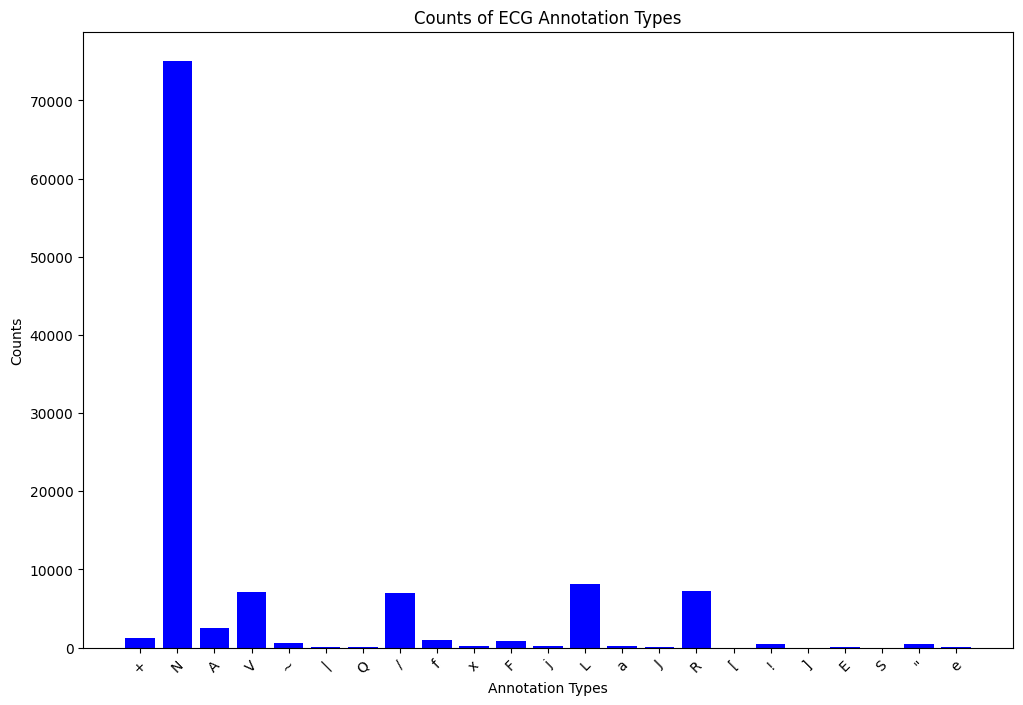

In [25]:
# Assuming ecg_df is already loaded and the 'Annotations' column contains lists
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to store counts of each annotation
annotation_counts = {}

# Count occurrences of each annotation across all records
for annotation_list in ecg_df['Annotations']:
    for annotation in annotation_list:
        if annotation in annotation_counts:
            annotation_counts[annotation] += 1
        else:
            annotation_counts[annotation] = 1

# Convert the dictionary to a DataFrame for easier plotting
annotations_df = pd.DataFrame(list(annotation_counts.items()), columns=['Annotation', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(annotations_df['Annotation'], annotations_df['Count'], color='blue')
plt.xlabel('Annotation Types')
plt.ylabel('Counts')
plt.title('Counts of ECG Annotation Types')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()
